## Guide for report structure

The structure of your report should be as follows (or very similar):

1. Author contributions
    - Clearly list who wrote what parts of the report
1. Introduction
   - Motivate the importance of your application (science, market, societal impact, etc.)
   - Reference relevant literature and background knowledge
2. Algorithm design
   - Describe (in your own words) how the algorithm works
   - Explain how the algorithm compares to related algorithms
2. Algorithm demonstration
   - Show that the algorithm works on multiple examples
3. Conclusions
4. References
5. Appendix
   - Include your code for algorithm implementation, generating of figures, etc.

The report may be written in LaTeX or as a Jupyter notebook.

###########################################################################################

# 1. Author Contributions
Douglas, Laurel, and Jiaxue worked together to construct this report on the A* Path Searching algorithm, with each member concentrating on specific parts:
Douglas (123117910): Wrote the Introduction, which established the A* algorithm's significance and context.
Laurel (123103884): wrote the section on algorithm design, which described how A* functions.
Jiaxue (123117138): Highlighted the Algorithm Demonstration with real-world examples.
Every input was crucial to producing a thorough report  of the A* algorithm.

1. Author contributions (Douglas)
2. Introduction (Douglas)
3. Algorithm design (Laurel)
4. Algorithm demonstration (Jiaxue)
5. Conclusions (Everyone)
6. References (Everyone)
7. Appendix



# 2. Introduction

## 2.1. Background

In the vast field of computer science including open source infrastructure, A* or A-star is a path search and graph traversal algorithm. It was created as part of the Shakey project  by Nils Nilsson, Peter Hart and  Bertram Rapheal [1]

Within the field of pathfinding and graph traversal algorithms, the A* (A-star) algorithm is a fundamental tool in the constantly changing field of computational problem-solving. Since its creation in 1968 [2], A* has been an essential tool in a wide range of applications, from robotics and real-world route planning to artificial intelligence in gaming[3]. Its continued relevance highlights the algorithm's effectiveness and versatility as well as its significant influence on the scientific community and society at large.
The main innovation of the A* algorithm is its heuristic-based search strategy, which enables it to efficiently determine the shortest path between two points[1].

<br/><br/>
## 2.2 Applications

With its ability to predict the direction of the target, this approach significantly outperforms its predecessors, such as Dijkstra's algorithm, and speeds up the search process. This advancement has far-reaching effects on everyday life.  The A* algorithm has been crucial to the development of video games in the fields of computer science and artificial intelligence, especially in the areas of non-player character (NPC) movement and decision-making[4]. Its use goes beyond virtual environments; it is crucial for robotics, particularly in autonomous vehicle navigation such as the mars rover[1], where finding the shortest path is  important.
Furthermore, the A* algorithm has an impact on society in addition to technological applications. For example, it helps to optimise traffic flow and public transit routes in urban planning and transportation, which has a direct impact on urban logistics and daily commutes[5]. The algorithm's value to society is further shown by its application in emergency response and catastrophe management, where quick and effective route design can save lives [6].
The broad and varied literature that surrounds the A* algorithm reflects the multidisciplinary applications of the method.

<br/><br/>
## 2.3. Related Works
The theoretical basis for the algorithm was established in its original 1968 paper "A Formal Basis for the Heuristic Determination of Minimum Cost Paths" by Hart, Nilsson, and Raphael[2]. Its fundamental ideas have been built upon by further research and publications, which have also optimised and modified it for a variety of particular uses, such as real-time navigation systems and AI in video games[2][6].

<br/><br/>
## 2.4. Aim and Objective
As we explore the complexities of the A* algorithm, it is important to recognise its fundamental significance in the advancement of technology as well as its practical applications that are relevant to our everyday lives. In addition to analysing the algorithm's workings, this report will shed light on its wide-ranging ramifications, demonstrating why, more than fifty years after its creation, A* remains a crucial instrument at the crossroads of computer science, technology, and society.



# 3. Algorithm

## 3.1. Design

The A* algorithm works in way to enable a computer to find the shortest path from one point to another.

Map Representation: Think of a map divided into squares or nodes. Each node represents a point on the map.


Start and Destination: You have a starting point (where you are) and a destination (where you want to go).


Exploration: A* starts at the beginning and explores neighboring nodes, trying to find the best path to the destination. It keeps track of the total distance traveled from the start and an estimate of the remaining distance to the destination for each node.


Cost Evaluation: For each node, A* calculates two values:
G-Score: The actual cost from the start node to the current node.
H-Score: An estimate of the cost from the current node to the destination (heuristic).


Priority Queue: Nodes are sorted based on a combined value of G-Score and H-Score. A* prioritizes nodes with the lowest combined score, thinking they might lead to the shortest path.


Pathfinding: A* moves through the nodes, considering the combination of the G-Score and H-Score. It continuously selects the node with the lowest total estimated cost and explores its neighbors.


Goal Reached: A* continues this process until it reaches the destination node. The path it took to get there forms the shortest route.


The A* algorithm balances efficiency by intelligently choosing nodes to explore. The H-Score helps guide the search towards the destination, while the G-Score ensures it takes the shortest path found so far.
This way, A* doesn't blindly search everywhere but uses information about the goal to find an optimal path more quickly than searching aimlessly. It's like having a GPS that intelligently evaluates different routes to find the fastest one for your road trip!







## Implementation of A*

In [2]:
import numpy as np

def heuristic(a, b):
    # Euclidean distance heuristic for A*
    return np.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)

def astar(array, start, goal):
    #Defines the possible movements from a node: up, down, left, and right.
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    #Lists to keep track of nodes that are yet to be explored (open_nodes) and nodes that have been explored (closed_nodes).
    open_nodes = [start]
    closed_nodes = []

    #Initializes the cost array with infinite values (np.inf) and sets the cost of the start node to zero.
    cost = np.full(array.shape, fill_value=np.inf)
    cost[start] = 0

    #Initialize a new array to store path
    came_from = np.full(array.shape + (2,), fill_value=-1)

    #The main loop of the A* algorithm runs until there are no nodes left to explore (open_nodes is empty).
    while open_nodes:
        # Sort open nodes based on total estimated cost
        open_nodes.sort(key=lambda x: cost[x] + heuristic(goal, x))
        current_node = open_nodes.pop(0)

        #If the current node is the goal, the function reconstructs and returns the path from the goal back to the start.
        if current_node == goal:
            path = []
            while not np.array_equal(current_node, start):
                path.append(current_node)
                current_node = came_from[current_node[0], current_node[1]]
            path.append(start)
            return np.array(path[::-1])

        #Adds the current node to the closed_nodes list to mark it as explored.
        closed_nodes.append(current_node)

        #Iterates through the possible neighbors of the current node.
        for neighbor in neighbors:
            new_node = (current_node[0] + neighbor[0], current_node[1] + neighbor[1])

            #Ensures the new node is within the grid boundaries.
            if 0 <= new_node[0] < array.shape[0] and 0 <= new_node[1] < array.shape[1]:
                #Calculates the cost to reach the new node from the current node.
                new_cost = cost[current_node] + array[new_node]


                #Skips the current neighbor if it has already been explored or represents an obstacle (value infinity in the grid).
                if new_node in closed_nodes or array[new_node] == np.inf:
                    continue

                #Updates the cost to reach the new node, adds it to the open_nodes, and records the path taken to reach this node.
                if new_cost < cost[new_node]:
                    cost[new_node] = new_cost
                    open_nodes.append(new_node)
                    came_from[new_node[0], new_node[1]] = current_node

    #If no path is found, the function returns None.
    return None  # No path found

# Replace 'np.inf' with weights, and 0s for obstacles if any
l=np.inf
grid = np.array([
    [0, 2, 0, 0],
    [0, l, l, 0],
    [0, 0, l, 0],
    [0, 0, 0, 0]
])

start_point = (0, 0)
goal_point = (0, 2)

path = astar(grid, start_point, goal_point)
if path is not None:
    print("Path found:", path)

else:
    print("No path found")


[[[-1 -1]
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 [[-1 -1]
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 [[-1 -1]
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 [[-1 -1]
  [-1 -1]
  [-1 -1]
  [-1 -1]]]
Path found: [[0 0]
 [0 1]
 [0 2]]


## 3.2. Performance of A* compared with other path finding algorithms

### 3.2.1. A* Vs Breadth First Search
BFS aims at systematically exploring all neighbors of a node before moving on to the next level of nodes in a graph.

While BFS guarantees the shortest path in unweighted graphs, A* balances between optimality and efficiency by utilizing heuristics, often outperforming BFS in scenarios with informed goals or weighted graphs. A* leverages heuristics to guide the search, making it faster in targeted pathfinding. BFS explores uniformly, taking significantly longer as it explores all neighbouring nodes before moving on to the next layer[7].
A* is better tha BFS in almost all cases. There might be some exceptions to this depending upon the requirements of the problem statement[7].


<br/><br/>
### 3.2.2. A* Vs Dijkstra’s algorithm
Dijkstra’s algorithm finds the shortest path from a single source node to all other nodes in a weighted graph.

A* is an evolution of Dijkstra's algorithm[8]. Dijkstra's guarantees optimality in finding the shortest path to all nodes, while A* focuses on finding the shortest path to a specific target node efficiently. In scenarios where the heuristic is well-designed and effective, A* tends to outperform Dijkstra's algorithm by reducing the number of nodes to explore[8]. A* can be implemented on an infinite graph whereas Dijkstra cannot[9].

Constraints:

Pathfinding to All Nodes: Dijkstra's algorithm inherently finds the shortest path from a single source node to all other nodes in the graph. If the requirement is to determine the shortest paths from one node to all other nodes without having a specific target node in mind, Dijkstra's algorithm is more suitable. A* is optimized for finding the shortest path to a specific target node, making it less efficient in scenarios where the goal is not predetermined.

Avoiding Heuristic-Induced Errors: It might not be possible to calculate a good heuristic function for some cases. In such a situation it is better to not use a heuristic requiring algorithm (A*) as it will increase the computation overhead without offering any advantage.

# 4. Algorithm demonstration
To demonstrate the effectiveness of the A* algorithm implemented in the code, there are three scenarios using both self-made fake data and real-world examples as follows. These scenarios will illustrate how the algorithm finds the shortest path in different types of grids, which represent various real-world situations such as road networks, mazes, or game maps. To make it clearer, we utilize matplotlib to plot the picture.


In [ ]:
# Visualization Function
import matplotlib.pyplot as plt

def visualize_path(grid, path, start, goal):
    plt.imshow(grid, cmap='gray')
    if path is not None:
        path = np.array(path)
        plt.scatter(path[:, 1], path[:, 0], color='blue')
    plt.scatter(start[1], start[0], color='green') # Start in Green
    plt.scatter(goal[1], goal[0], color='red') # Goal in Red
    plt.show()

### Example 1: Simple Grid
Consider that there's a simple 5×5 grid where some cells are blocked, and the goal is to find the shortest path from the top-left corner to the bottom-right corner. This example use self-made data. The path found by the A* algorithm is marked in blue. The start and goal points are marked in green and red, respectively. Obstacles (unpassable cells) are represented in black. The algorithm successfully navigates around the obstacles to find the shortest path. Code as follows:


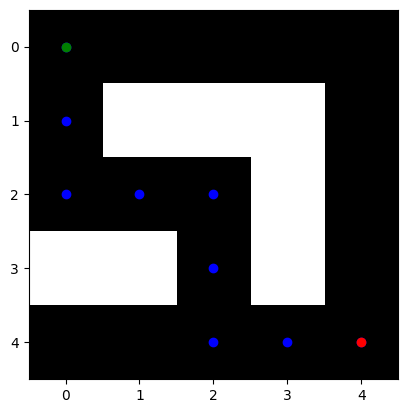

In [ ]:
grid1 = np.array([
    [1, 1, 1, 1, 1],
    [1, np.inf, np.inf, np.inf, 1],
    [1, 1, 1, np.inf, 1],
    [np.inf, np.inf, 1, np.inf, 1],
    [1, 1, 1, 1, 1]
])
start1 = (0, 0)
goal1 = (4, 4)
path1 = astar(grid1, start1, goal1)

visualize_path(grid1, path1, start1, goal1)

### Example 2: Maze Solving
Consider that there's a 10×10 maze where the goal is to find a path from top-right corner to the bottom-right corner.This example use self-made data. The path is marked in blue, with the start and goal points in green and red. The algorithm effectively finds a path through the maze, demonstrating its ability to handle more complex grid layouts with numerous obstacles.


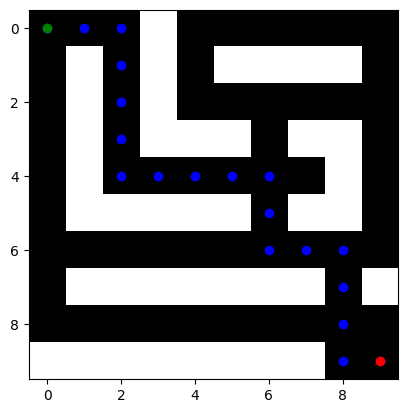

In [ ]:
grid2 = np.array([
    [1, 1, 1, np.inf, 1, 1, 1, 1, 1, 1],
    [1, np.inf, 1, np.inf, 1, np.inf, np.inf, np.inf, np.inf, 1],
    [1, np.inf, 1, np.inf, 1, 1, 1, 1, 1, 1],
    [1, np.inf, 1, np.inf, np.inf, np.inf, 1, np.inf, np.inf, 1],
    [1, np.inf, 1, 1, 1, 1, 1, 1, np.inf, 1],
    [1, np.inf, np.inf, np.inf, np.inf, np.inf, 1, np.inf, np.inf, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 1, np.inf],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 1, 1]
])
start2 = (0, 0)
goal2 = (9, 9)
path2 = astar(grid2, start2, goal2)

visualize_path(grid2, path2, start2, goal2)

### Example 3: Game Scene
In this example, a game map is created, which contains different terrain types, such as plains, mountains, rivers, and forests, each with different passing costs. This will bring the application of the A* algorithm closer to what would happen in an actual game or simulation environment. The grid size is 20x20.

The terrain types include: plains (low cost), mountains (high cost), rivers (medium cost), forests (slightly high cost), and roads (very low cost). The starting point is the upper left corner (0,0) and the end point is the lower right corner (19,19).

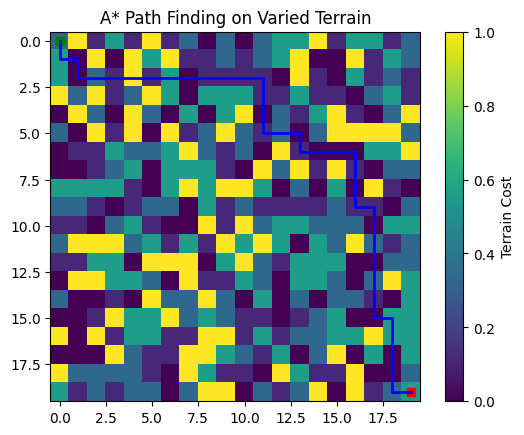

In [ ]:
# Define the costs for different terrains
TERRAIN_COST = {
    'plain': 1,   # Plains
    'mountain': 5,  # Mountains
    'river': 2,   # Rivers
    'forest': 3,  # Forests
    'road': 0.5   # Roads
}

# Creating a terrain grid
grid_size = 20
terrain_grid = np.random.choice(list(TERRAIN_COST.values()), size=(grid_size, grid_size))

# Define the start and end points
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Executing the A* algorithm
path = astar(terrain_grid, start, goal)

# Rewrite Visualization function
def visualize_terrain_path(grid, path, start, goal):
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    if path is not None:
        ys, xs = zip(*path)
        plt.plot(xs, ys, color='blue', linewidth=2)
    plt.scatter([start[1]], [start[0]], color='green', marker='s')  # Start point
    plt.scatter([goal[1]], [goal[0]], color='red', marker='s')  # End point
    plt.colorbar(label='Terrain Cost')
    plt.title('A* Path Finding on Varied Terrain')
    plt.show()

# Display the visualization
visualize_terrain_path(terrain_grid, path, start, goal)

# 5. Conclusion


# 6. References

[1.] ETHW. Milestones:shakey: The World’s First Mobile Intelligent Robot, 1972. ETHW [online]. 20 November 2023. [Accessed 24 November 2023]. Available from: https://ethw.org/Milestones%3ASHAKEY%3A_The_World%E2%80%99s_First_Mobile_Intelligent_Robot%2C_1972

[2.] HART, Peter, NILSSON, Nils and RAPHAEL, Bertram. A formal basis for the heuristic determination of minimum cost paths. IEEE Transactions on Systems Science and Cybernetics. 1968. Vol. 4, no. 2, p. 100–107. DOI 10.1109/tssc.1968.300136.

[3.] MATHEW, Geethu Elizebeth and MALATHY, G. Direction based heuristic for Pathfinding in Video Games. 2015 2nd International Conference on Electronics and Communication Systems (ICECS). 2015. DOI 10.1109/ecs.2015.7124867.

[4.] MATHEW, Geethu Elizebeth. Direction based heuristic for Pathfinding in Video Games. Procedia Computer Science. 2015. Vol. 47, p. 262–271. DOI 10.1016/j.procs.2015.03.206.

[5.]Traffic prediction framework gets the green light. A*STAR Research [online]. 8 August 2023. [Accessed 24 November 2023]. Available from: https://research.a-star.edu.sg/articles/highlights/traffic-prediction-framework-gets-the-green-light/

[6.] MANTORO, Teddy, ALAMSYAH, Zaenal and AYU, Media Anugerah. Pathfinding for disaster emergency route using sparse A* and dijkstra algorithm with augmented reality. 2021 IEEE 7th International Conference on Computing, Engineering and Design (ICCED). 2021. DOI 10.1109/icced53389.2021.9664869.

[7.]Permana, Silvester & Bintoro, Ketut & Arifitama, Budi & Syahputra, Ade. (2018). Comparative Analysis of Pathfinding Algorithms A *, Dijkstra, and BFS on Maze Runner Game. IJISTECH (International Journal Of Information System & Technology). 1. 1. 10.30645/ijistech.v1i2.7. Available from https://www.researchgate.net/publication/325368698_Comparative_Analysis_of_Pathfinding_Algorithms_A_Dijkstra_and_BFS_on_Maze_Runner_Game

[8.]Zidane, Issa & Ibrahim, Khalil. (2018). Wavefront and A-Star Algorithms for Mobile Robot Path Planning. 69-80. 10.1007/978-3-319-64861-3_7. Available from : https://www.researchgate.net/publication/319404402_Wavefront_and_A-Star_Algorithms_for_Mobile_Robot_Path_Planning

[9.]Dijkstra vs. A* – Pathfinding, by Milos Simic. Available from : https://www.baeldung.com/cs/dijkstra-vs-a-pathfinding


# 7. Appendix